# Exploring Dandiset 000690: Allen Institute Openscope - Vision2Hippocampus project

**⚠️ DISCLAIMER: This notebook was AI-generated and has not been fully verified. Users should be cautious when interpreting the code or results.**

## Overview

This Dandiset contains neural recordings from the Allen Institute Openscope Vision2Hippocampus project, which seeks to understand how visual representations evolve from early visual areas to higher-order regions like the hippocampus. The dataset includes Neuropixel probe recordings from multiple brain regions during presentation of various visual stimuli.

You can access the full dataset here: [https://dandiarchive.org/dandiset/000690](https://dandiarchive.org/dandiset/000690)

This notebook will guide you through:
1. Loading and exploring the dataset structure
2. Examining electrode locations and brain regions
3. Visualizing stimulus presentations
4. Analyzing neural responses to visual stimuli
5. Exploring relationships between neural activity and behavior

## Required Packages

The following packages are needed to work with this Dandiset:

In [1]:
# Import required packages
import pynwb
import h5py
import remfile
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats, signal
import seaborn as sns

# Set plotting style
sns.set_theme()
plt.rcParams['figure.figsize'] = (12, 8)

## Loading the Dandiset with DANDI API

We'll use the DANDI API to access the Dandiset and load a sample NWB file:

In [2]:
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("000690")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")

# List the assets in the Dandiset
assets = list(dandiset.get_assets())
print(f"\nFound {len(assets)} assets in the dataset")
print("\nFirst 5 assets:")
for asset in assets[:5]:
    print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: Allen Institute Openscope - Vision2Hippocampus project
Dandiset URL: https://dandiarchive.org/dandiset/000690/0.250326.0015

Found 156 assets in the dataset

First 5 assets:
- sub-692077/sub-692077_ses-1300222049_probe-4_ecephys.nwb (ID: b0ea16d5-42eb-4b56-87cc-7d7b7efab4db)
- sub-692077/sub-692077_ses-1300222049_probe-3_ecephys.nwb (ID: e0ad1921-75f1-43ed-aa86-8e1a45a9f49d)
- sub-692077/sub-692077_ses-1300222049_probe-2_ecephys.nwb (ID: 97712120-158d-492a-ae21-61515335bc18)
- sub-692077/sub-692077_ses-1300222049_probe-0_ecephys.nwb (ID: de12ccea-83a7-4d7f-937c-4c02e4d3bf44)
- sub-692077/sub-692077_ses-1300222049.nwb (ID: 8ae65111-a130-47fc-a108-55e695374739)


## Loading a Sample Session NWB File

Let's load a sample session to explore its structure:

In [3]:
# Load a session file to examine its structure
def load_nwb_file(asset_id):
    """Load an NWB file from DANDI archive by asset ID."""
    url = f"https://api.dandiarchive.org/api/assets/{asset_id}/download/"
    print(f"Loading file from {url}")
    
    remote_file = remfile.File(url)
    h5_file = h5py.File(remote_file)
    io = pynwb.NWBHDF5IO(file=h5_file)
    nwb = io.read()
    return nwb, h5_file, io

# Let's examine the main session file for subject 692072
session_asset_id = "fbcd4fe5-7107-41b2-b154-b67f783f23dc"
session_nwb, session_h5, session_io = load_nwb_file(session_asset_id)

# Basic information about the session
print(f"Session ID: {session_nwb.session_id}")
print(f"Session description: {session_nwb.session_description}")
print(f"Institution: {session_nwb.institution}")
print(f"Session start time: {session_nwb.session_start_time}")

# Subject information
print("\nSubject information:")
print(f"Subject ID: {session_nwb.subject.subject_id}")
print(f"Species: {session_nwb.subject.species}")
print(f"Age: {session_nwb.subject.age} ({session_nwb.subject.age_in_days} days)")
print(f"Sex: {session_nwb.subject.sex}")
print(f"Genotype: {session_nwb.subject.genotype}")

Loading file from https://api.dandiarchive.org/api/assets/fbcd4fe5-7107-41b2-b154-b67f783f23dc/download/


/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.6.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.3.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Session ID: 1298465622
Session description: Data and metadata for an Ecephys session
Institution: Allen Institute
Session start time: 2023-09-21 00:00:00-07:00

Subject information:
Subject ID: 692072
Species: Mus musculus
Age: P82D (82.0 days)
Sex: M
Genotype: wt/wt


## Exploring Electrode Locations and Brain Regions

Now, let's load a probe file to examine the electrode locations and brain regions recorded:

Loading file from https://api.dandiarchive.org/api/assets/ba8760f9-91fe-4c1c-97e6-590bed6a783b/download/


Probe NWB identifier: 0
Probe session description: LFP data and associated info for one probe

Electrode information summary:
Number of electrodes: 95
Number of valid electrodes: 95

Number of electrodes by brain region:
- CA1: 23 electrodes
- LP: 16 electrodes
- DG-mo: 12 electrodes
- RSPagl5: 9 electrodes
- root: 8 electrodes
- DG-sg: 6 electrodes
- RSPagl2/3: 5 electrodes
- RSPagl6a: 4 electrodes
- TH: 3 electrodes
- RSPagl1: 3 electrodes
- VISa6a: 2 electrodes
- DG-po: 2 electrodes
- PF: 1 electrodes
- VISa6b: 1 electrodes


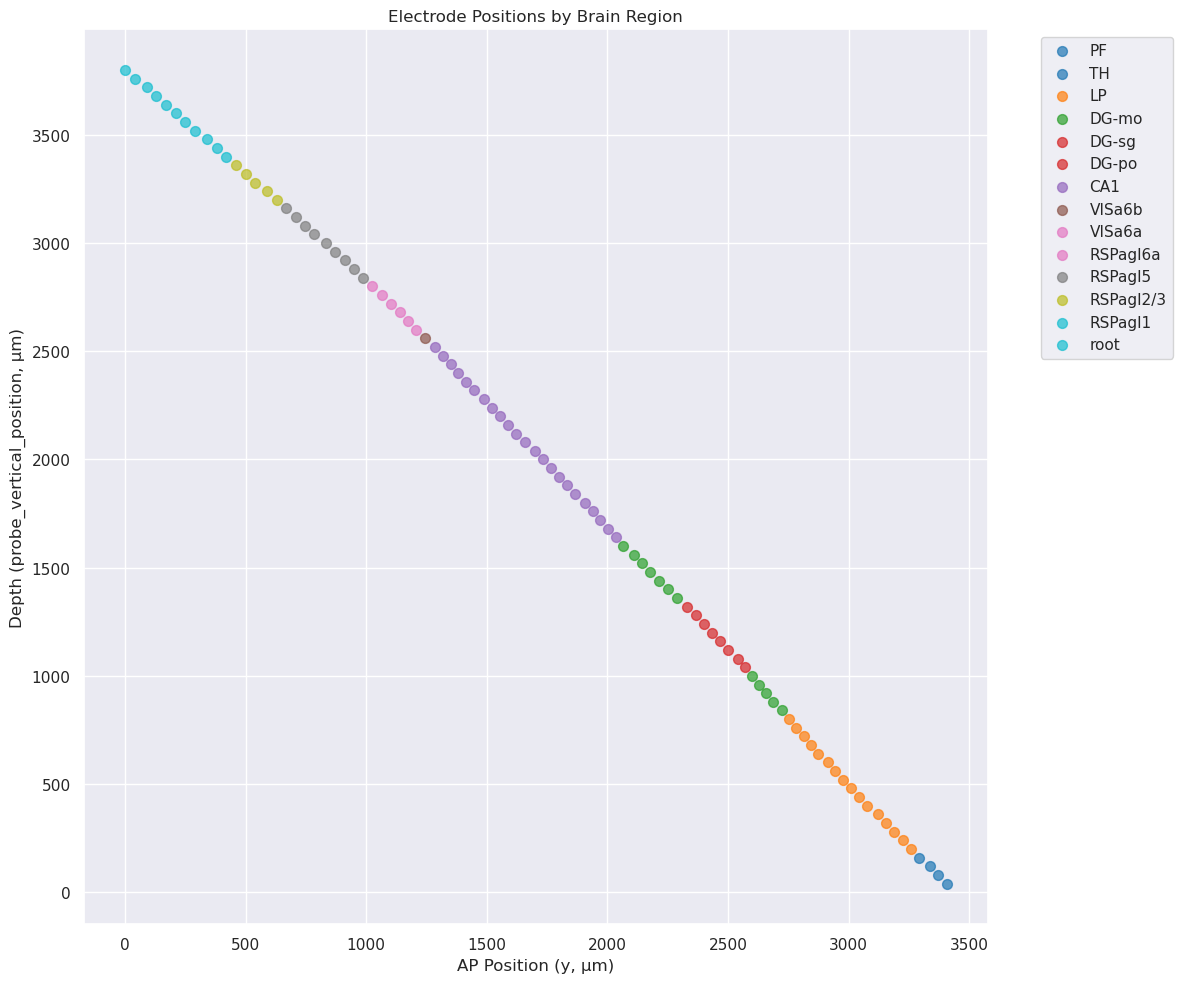

In [4]:
# Load a probe ecephys file
probe_asset_id = "ba8760f9-91fe-4c1c-97e6-590bed6a783b"  # probe 0
probe_nwb, probe_h5, probe_io = load_nwb_file(probe_asset_id)

# Summary of the probe file
print(f"Probe NWB identifier: {probe_nwb.identifier}")
print(f"Probe session description: {probe_nwb.session_description}")

# Get electrode information
electrodes_df = probe_nwb.electrodes.to_dataframe()

# Print summary of electrode information
print("\nElectrode information summary:")
print(f"Number of electrodes: {len(electrodes_df)}")
print(f"Number of valid electrodes: {sum(electrodes_df['valid_data'])}")

# Count electrodes by brain region
region_counts = electrodes_df['location'].value_counts()
print("\nNumber of electrodes by brain region:")
for region, count in region_counts.items():
    print(f"- {region}: {count} electrodes")

# Visualize electrode positions
plt.figure(figsize=(12, 10))
# Group by brain region and assign colors
regions = electrodes_df['location'].unique()
colors = plt.cm.tab10(np.linspace(0, 1, len(regions)))
region_to_color = dict(zip(regions, colors))

for region in regions:
    region_electrodes = electrodes_df[electrodes_df['location'] == region]
    plt.scatter(
        region_electrodes['y'], 
        region_electrodes['probe_vertical_position'],
        label=region,
        c=[region_to_color[region]],
        s=50,
        alpha=0.7
    )

plt.xlabel('AP Position (y, μm)')
plt.ylabel('Depth (probe_vertical_position, μm)')
plt.title('Electrode Positions by Brain Region')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Examining LFP Data

Let's look at the LFP data to understand the neural activity:

LFP data shape: (10117092, 95)
LFP sampling rate: 1250.0042273023978 Hz


LFP duration: 8093.65 seconds


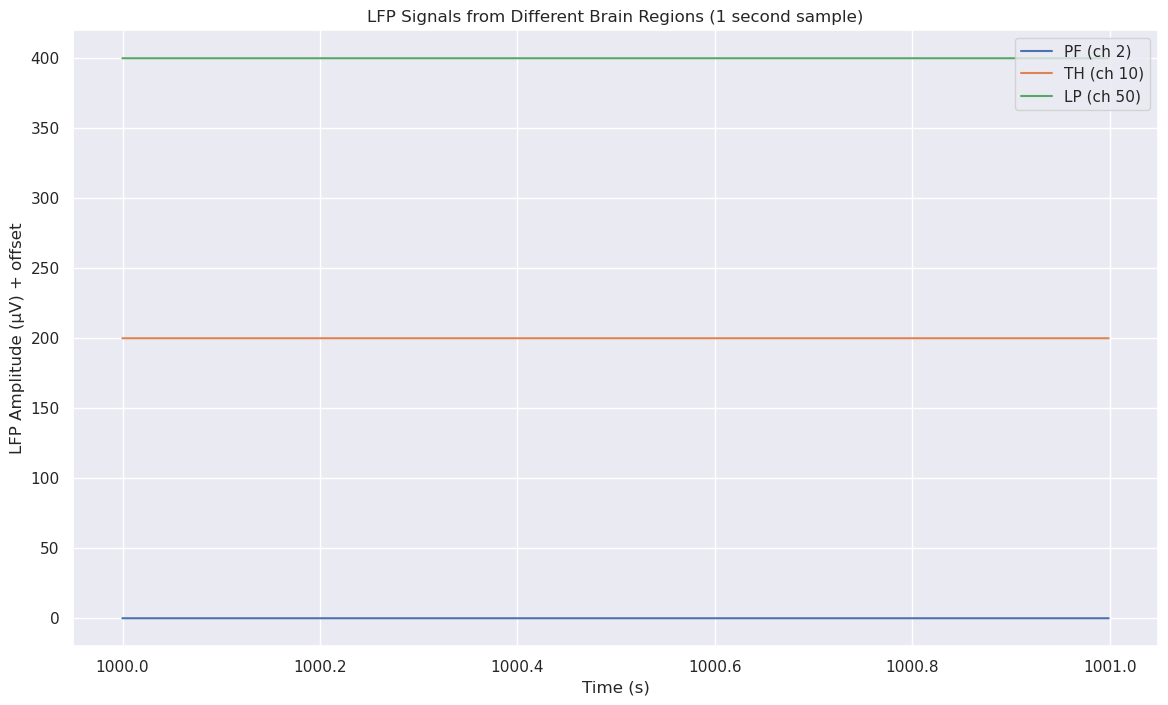

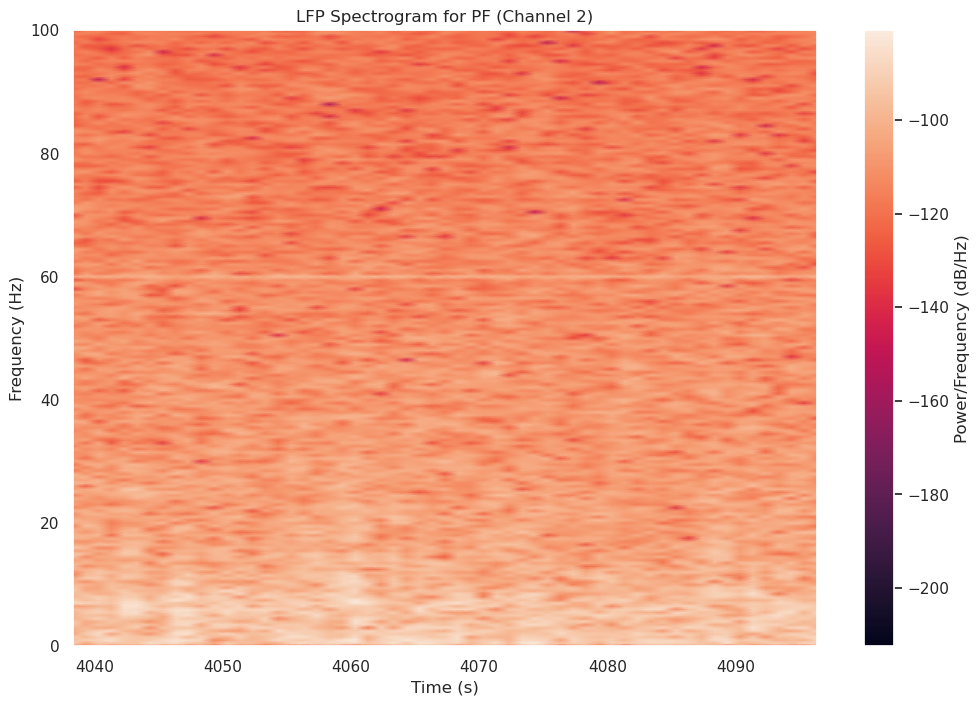

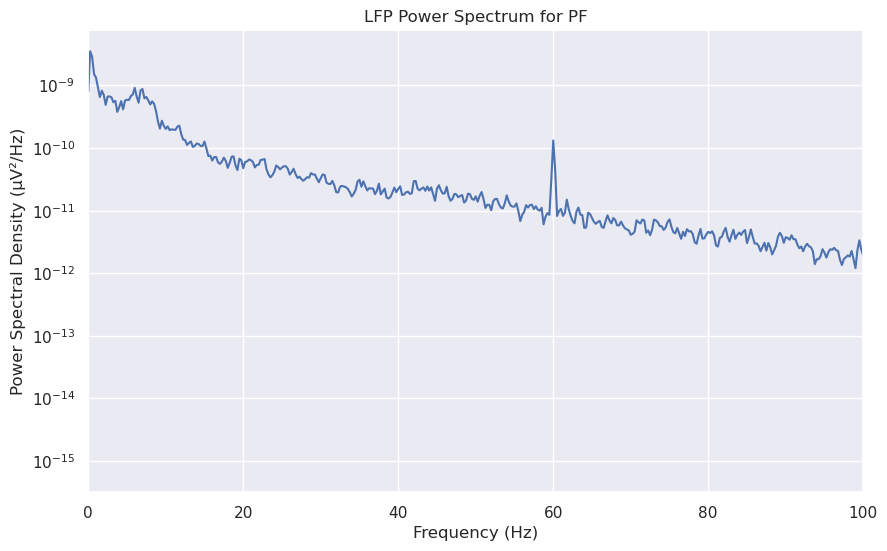

In [5]:
# Examine LFP data structure from the probe
if 'probe_0_lfp' in probe_nwb.acquisition:
    lfp = probe_nwb.acquisition['probe_0_lfp']
    lfp_data = lfp.electrical_series['probe_0_lfp_data']
    
    print(f"LFP data shape: {lfp_data.data.shape}")
    print(f"LFP sampling rate: {1 / (lfp_data.timestamps[1] - lfp_data.timestamps[0])} Hz")
    print(f"LFP duration: {lfp_data.timestamps[-1] - lfp_data.timestamps[0]:.2f} seconds")
    
    # Plot a sample of LFP data (1 second) from different brain regions
    # Select one channel from each unique brain region
    regions_to_sample = min(5, len(regions))
    sample_channels = []
    
    for i, region in enumerate(regions[:regions_to_sample]):
        # Find channels in this region
        region_electrodes = electrodes_df[electrodes_df['location'] == region]
        if len(region_electrodes) > 0:
            # Take the middle electrode from this region
            idx = len(region_electrodes) // 2
            channel = region_electrodes.index[idx]
            if channel < lfp_data.data.shape[1]:
                sample_channels.append((channel, region))
    
    # Plot LFP data for selected channels
    duration_to_plot = 1.0  # seconds
    start_time = 1000  # seconds into recording
    
    # Find index corresponding to start_time
    start_idx = np.argmin(np.abs(lfp_data.timestamps[:] - start_time))
    sample_rate = 1 / (lfp_data.timestamps[1] - lfp_data.timestamps[0])
    num_samples = int(duration_to_plot * sample_rate)
    
    plt.figure(figsize=(14, 8))
    
    for i, (channel, region) in enumerate(sample_channels):
        # Get LFP data
        lfp_snippet = lfp_data.data[start_idx:start_idx+num_samples, channel]
        
        # Apply high-pass filter to better see oscillations
        def highpass_filter(data, cutoff, fs, order=5):
            nyq = 0.5 * fs
            normal_cutoff = cutoff / nyq
            b, a = signal.butter(order, normal_cutoff, btype='high', analog=False)
            y = signal.filtfilt(b, a, data)
            return y
        
        # Filter above 0.5 Hz to remove DC offset
        lfp_filtered = highpass_filter(lfp_snippet, cutoff=1.0, fs=sample_rate)
        
        # Plot with offset for visibility
        offset = i * 200
        plt.plot(lfp_data.timestamps[start_idx:start_idx+num_samples],
                 lfp_filtered + offset,
                 label=f"{region} (ch {channel})")
    
    plt.xlabel('Time (s)')
    plt.ylabel('LFP Amplitude (μV) + offset')
    plt.title(f'LFP Signals from Different Brain Regions (1 second sample)')
    plt.legend()
    plt.show()
    
    # Also analyze frequency content with a spectrogram for one channel
    if len(sample_channels) > 0:
        channel, region = sample_channels[0]  # Take first channel
        segment_length = 60  # seconds
        segment_samples = int(segment_length * sample_rate)
        
        # Take a segment from the middle of the recording
        midpoint = len(lfp_data.timestamps) // 2
        segment_start = max(0, midpoint - segment_samples // 2)
        segment_end = min(len(lfp_data.timestamps), segment_start + segment_samples)
        
        # Get data segment
        lfp_segment = lfp_data.data[segment_start:segment_end, channel]
        
        # Calculate spectrogram
        f, t, Sxx = signal.spectrogram(lfp_segment, fs=sample_rate, nperseg=int(sample_rate * 2),
                                      noverlap=int(sample_rate), detrend='linear')
        
        # Plot spectrogram
        plt.figure(figsize=(12, 8))
        plt.pcolormesh(t + lfp_data.timestamps[segment_start], f, 10 * np.log10(Sxx), shading='gouraud')
        plt.ylabel('Frequency (Hz)')
        plt.xlabel('Time (s)')
        plt.ylim(0, 100)  # Limit to frequencies below 100Hz
        plt.colorbar(label='Power/Frequency (dB/Hz)')
        plt.title(f'LFP Spectrogram for {region} (Channel {channel})')
        plt.show()
        
        # Also show power spectrum
        # Calculate power spectrum with Welch's method
        f, Pxx = signal.welch(lfp_segment, fs=sample_rate, nperseg=int(sample_rate * 4),
                             scaling='density', detrend='linear')
        
        # Plot power spectrum
        plt.figure(figsize=(10, 6))
        plt.semilogy(f, Pxx)
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('Power Spectral Density (μV²/Hz)')
        plt.xlim(0, 100)
        plt.grid(True)
        plt.title(f'LFP Power Spectrum for {region}')
        plt.show()
else:
    print("No LFP data found in this probe file")

## Exploring Visual Stimuli

Next, let's explore the visual stimuli presented during the experiment:

Found 20 stimulus presentation intervals

Types of stimuli presented:


1. Disco2SAC_Wd15_Vel2_Bndry1_Cntst0_loop_presentations: 28800 presentations


2. Disk_Wd15_Vel2_Bndry1_Cntst0_loop_presentations: 14400 presentations


3. GreenSAC_Wd15_Vel2_Bndry1_Cntst0_loop_presentations: 14400 presentations


4. Ring_Wd15_Vel2_Bndry1_Cntst0_loop_presentations: 28800 presentations


5. SAC_Wd15_Vel2_Bndry1_Cntst0_loop_presentations: 28800 presentations


6. SAC_Wd15_Vel2_Bndry1_Cntst1_loop_presentations: 14400 presentations


7. SAC_Wd15_Vel2_Bndry2_Cntst0_loop_presentations: 17040 presentations


8. SAC_Wd15_Vel2_Bndry2_Cntst0_oneway_presentations: 8520 presentations


9. SAC_Wd15_Vel2_Bndry3_Cntst0_loop_presentations: 22320 presentations


10. SAC_Wd15_Vel8_Bndry1_Cntst0_loop_presentations: 57600 presentations


11. SAC_Wd45_Vel2_Bndry1_Cntst0_loop_presentations: 14400 presentations


12. UD_Wd15_Vel2_Bndry1_Cntst0_loop_presentations: 28800 presentations


13. acurl_Wd15_Vel2_Bndry1_Cntst0_oneway_presentations: 7200 presentations


14. curl_Wd15_Vel2_Bndry1_Cntst0_oneway_presentations: 7200 presentations


15. natmovie_CricketsOnARock_540x960Full_584x460Active_presentations: 14400 presentations


16. natmovie_EagleSwooping1_540x960Full_584x460Active_presentations: 14400 presentations


17. natmovie_EagleSwooping2_540x960Full_584x460Active_presentations: 14400 presentations


18. natmovie_SnakeOnARoad_540x960Full_584x460Active_presentations: 14400 presentations


19. natmovie_Squirreland3Mice_540x960Full_584x460Active_presentations: 14400 presentations


20. receptive_field_block_presentations: 3840 presentations



SAC_Wd15_Vel2_Bndry1_Cntst0_loop_presentations:
  Number of presentations: 28800
  Total duration: 480.44 seconds
  Average presentation duration: 0.0167 seconds
  Frame rate: 59.9 frames/second



natmovie_EagleSwooping1_540x960Full_584x460Active_presentations:
  Number of presentations: 14400
  Total duration: 240.20 seconds
  Average presentation duration: 0.0167 seconds
  Frame rate: 59.9 frames/second



Disco2SAC_Wd15_Vel2_Bndry1_Cntst0_loop_presentations:
  Number of presentations: 28800
  Total duration: 480.40 seconds
  Average presentation duration: 0.0167 seconds
  Frame rate: 59.9 frames/second


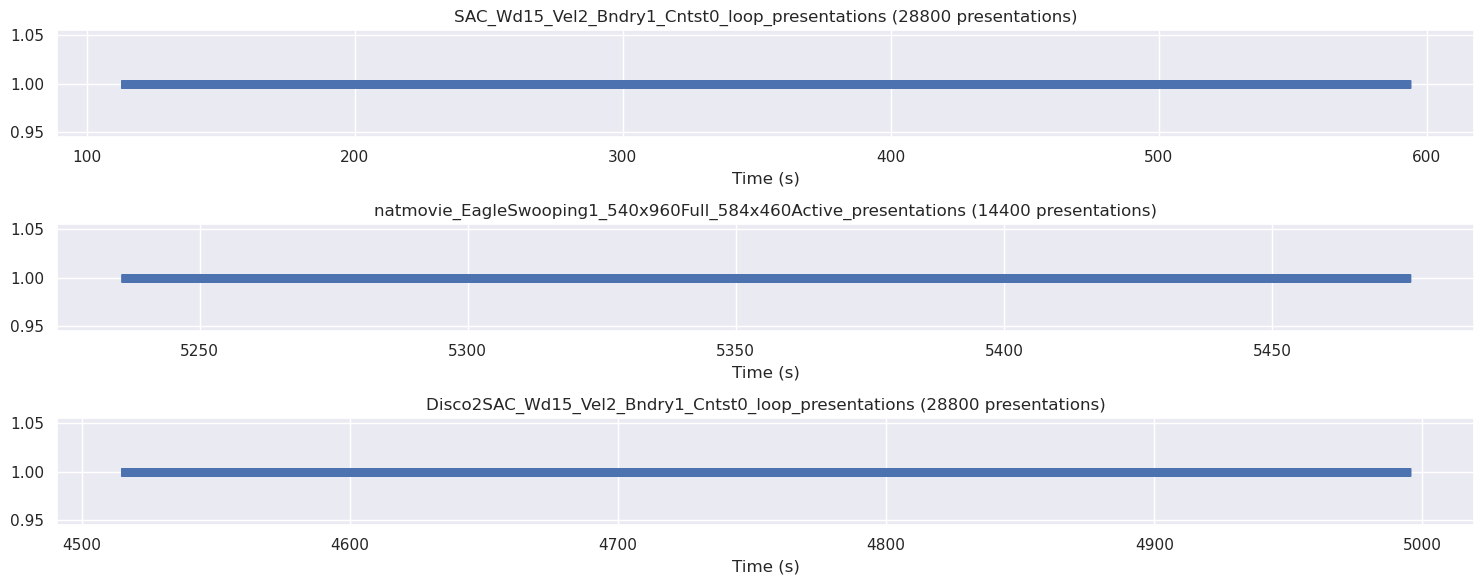

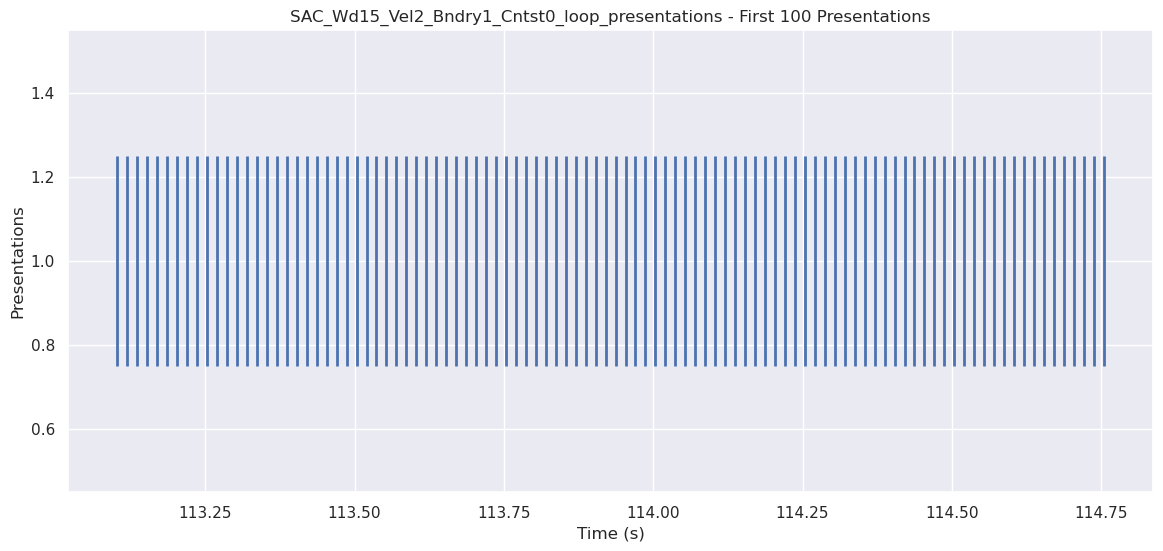

In [6]:
# Explore the stimulus presentations in the session file
stim_intervals = [k for k in session_nwb.intervals.keys() if "presentations" in k]
print(f"Found {len(stim_intervals)} stimulus presentation intervals")

# List the different types of stimuli
print("\nTypes of stimuli presented:")
for i, stim_type in enumerate(stim_intervals):
    if stim_type in session_nwb.intervals:
        # Get presentation dataframe
        df = session_nwb.intervals[stim_type].to_dataframe()
        print(f"{i+1}. {stim_type}: {len(df)} presentations")

# Examine a few key stimulus types more closely
stimulus_types_to_analyze = [
    'SAC_Wd15_Vel2_Bndry1_Cntst0_loop_presentations',  # Standard moving bar
    'natmovie_EagleSwooping1_540x960Full_584x460Active_presentations',  # Natural movie
    'Disco2SAC_Wd15_Vel2_Bndry1_Cntst0_loop_presentations'  # "Disco" bar
]

# Plot presentation times for these stimuli
plt.figure(figsize=(15, len(stimulus_types_to_analyze) * 2))

for i, stim_type in enumerate(stimulus_types_to_analyze):
    if stim_type in session_nwb.intervals:
        # Get presentation dataframe
        df = session_nwb.intervals[stim_type].to_dataframe()
        
        # Extract start times
        start_times = df['start_time'].values
        durations = df['stop_time'].values - df['start_time'].values
        
        # Plot
        plt.subplot(len(stimulus_types_to_analyze), 1, i+1)
        plt.plot(start_times, np.ones_like(start_times), '|')
        plt.title(f"{stim_type} ({len(start_times)} presentations)")
        plt.xlabel('Time (s)')
        
        # Print stats
        mean_dur = np.mean(durations)
        
        print(f"\n{stim_type}:")
        print(f"  Number of presentations: {len(start_times)}")
        print(f"  Total duration: {np.sum(durations):.2f} seconds")
        print(f"  Average presentation duration: {mean_dur:.4f} seconds")
        print(f"  Frame rate: {1/mean_dur:.1f} frames/second")

plt.tight_layout()
plt.show()

# Plot a zoomed-in view of stimulus presentations
if len(stimulus_types_to_analyze) > 0 and stimulus_types_to_analyze[0] in session_nwb.intervals:
    stim_type = stimulus_types_to_analyze[0]
    df = session_nwb.intervals[stim_type].to_dataframe()
    
    # Get first 100 presentations
    if len(df) > 100:
        df = df.iloc[:100]
    
    plt.figure(figsize=(14, 6))
    plt.eventplot(df['start_time'].values, lineoffsets=1, linelengths=0.5, linewidths=2)
    plt.title(f"{stim_type} - First {len(df)} Presentations")
    plt.xlabel('Time (s)')
    plt.ylabel('Presentations')
    plt.show()

## Behavioral Data Analysis

Let's examine the animal's running behavior during the experiment:

Running speed summary:
Duration: 7043.93 seconds
Average running speed: 0.99 cm/s
Maximum running speed: 68.58 cm/s
Time spent running (> 5 cm/s): 7.7%


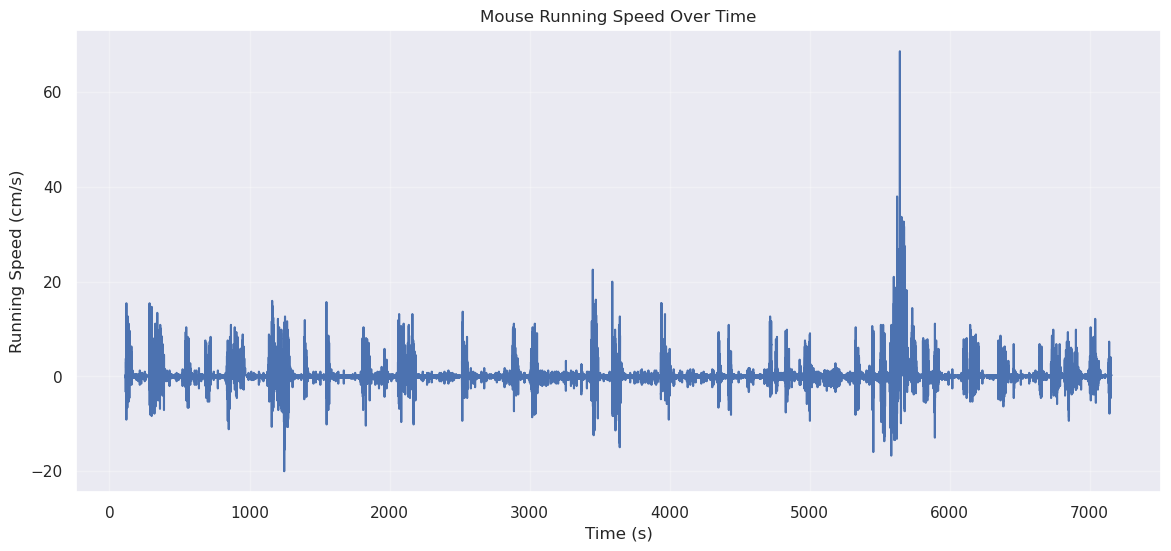

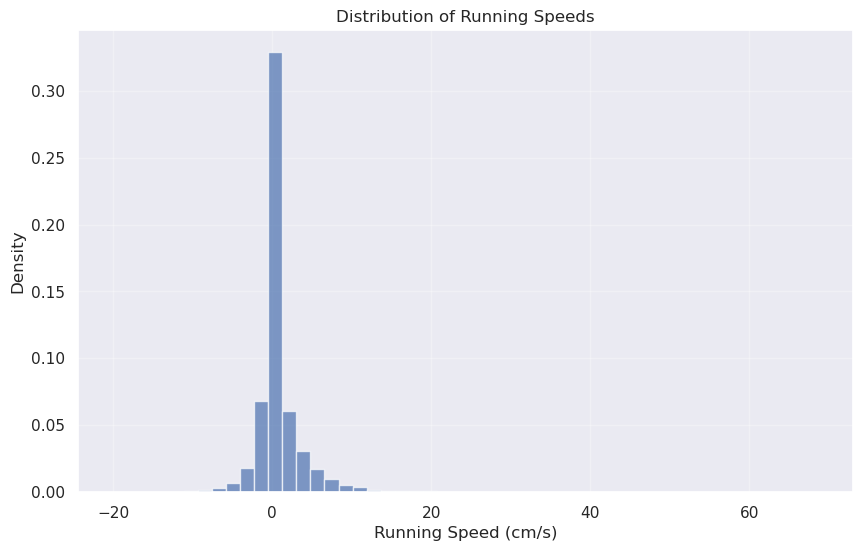

Analyzing running during 100 presentations of SAC_Wd15_Vel2_Bndry1_Cntst0_loop_presentations
Not enough valid trials for analysis


Analyzing running during 100 presentations of natmovie_EagleSwooping1_540x960Full_584x460Active_presentations
Not enough valid trials for analysis


Analyzing running during 100 presentations of Disco2SAC_Wd15_Vel2_Bndry1_Cntst0_loop_presentations
Not enough valid trials for analysis


In [7]:
# Explore running behavior
if 'running' in session_nwb.processing:
    running_module = session_nwb.processing['running']
    
    if 'running_speed' in running_module.data_interfaces:
        running_speed = running_module.data_interfaces['running_speed']
        
        # Get running speed data
        speed_data = running_speed.data[:]
        timestamps = running_speed.timestamps[:]
        
        print("Running speed summary:")
        print(f"Duration: {timestamps[-1] - timestamps[0]:.2f} seconds")
        print(f"Average running speed: {np.mean(speed_data):.2f} cm/s")
        print(f"Maximum running speed: {np.max(speed_data):.2f} cm/s")
        print(f"Time spent running (> 5 cm/s): {np.sum(speed_data > 5) / len(speed_data) * 100:.1f}%")
        
        # Plot running speed
        plt.figure(figsize=(14, 6))
        plt.plot(timestamps, speed_data)
        plt.xlabel('Time (s)')
        plt.ylabel('Running Speed (cm/s)')
        plt.title('Mouse Running Speed Over Time')
        plt.grid(True, alpha=0.3)
        plt.show()
        
        # Histogram of running speeds
        plt.figure(figsize=(10, 6))
        plt.hist(speed_data, bins=50, density=True, alpha=0.7)
        plt.xlabel('Running Speed (cm/s)')
        plt.ylabel('Density')
        plt.title('Distribution of Running Speeds')
        plt.grid(True, alpha=0.3)
        plt.show()
        
        # Examine running during stimulus presentations
        def analyze_running_during_stimulus(stim_name, running_speed_series, speed_timestamps):
            """Analyze running behavior during a specific stimulus type."""
            if stim_name not in session_nwb.intervals:
                print(f"Stimulus {stim_name} not found in intervals")
                return None
            
            # Get presentation times
            stim_df = session_nwb.intervals[stim_name].to_dataframe()
            
            # Limit to 100 presentations for computational efficiency
            if len(stim_df) > 100:
                stim_df = stim_df.iloc[:100]
            
            print(f"Analyzing running during {len(stim_df)} presentations of {stim_name}")
            
            # Define the pre/post time window
            pre_time = 1.0  # seconds before stimulus
            post_time = 3.0  # seconds after stimulus
            
            # Process each stimulus presentation
            all_speed_profiles = []
            
            for _, stim in stim_df.iterrows():
                stim_start = stim['start_time']
                stim_end = stim['stop_time']
                stim_duration = stim_end - stim_start
                
                # Find the closest timestamp indices
                start_idx = np.searchsorted(speed_timestamps, stim_start - pre_time)
                end_idx = np.searchsorted(speed_timestamps, stim_end + post_time)
                
                if start_idx >= end_idx or start_idx >= len(speed_timestamps) or end_idx >= len(speed_timestamps):
                    continue
                
                # Get speed data around this stimulus
                speeds = running_speed_series[start_idx:end_idx]
                times = speed_timestamps[start_idx:end_idx]
                
                # Calculate time relative to stimulus start
                rel_times = times - stim_start
                
                # Save the speed profile for this presentation
                all_speed_profiles.append((rel_times, speeds))
            
            if not all_speed_profiles:
                print("No valid stimulus presentations found")
                return None
            
            # Calculate and plot the average speed profile
            # First interpolate onto a common time base
            common_times = np.linspace(-pre_time, post_time, 500)
            interp_speeds = []
            
            for rel_times, speeds in all_speed_profiles:
                if min(rel_times) <= -pre_time and max(rel_times) >= post_time:
                    # Only use trials with full time range
                    interp_speed = np.interp(common_times, rel_times, speeds)
                    interp_speeds.append(interp_speed)
            
            if interp_speeds:
                # Calculate mean and SEM
                avg_speed = np.mean(interp_speeds, axis=0)
                sem_speed = stats.sem(interp_speeds, axis=0)
                
                # Create plot
                plt.figure(figsize=(12, 6))
                plt.plot(common_times, avg_speed, color='blue', linewidth=2, label='Mean')
                plt.fill_between(common_times, avg_speed - sem_speed, avg_speed + sem_speed, 
                                color='blue', alpha=0.2, label='SEM')
                
                # Add stimulus period indicator
                stim_duration = np.mean(stim_df['stop_time'] - stim_df['start_time'])
                plt.axvspan(0, stim_duration, color='red', alpha=0.1, label='Stimulus')
                plt.axvline(x=0, color='red', linestyle='--', label='Stimulus Onset')
                
                plt.xlabel('Time Relative to Stimulus Onset (s)')
                plt.ylabel('Running Speed (cm/s)')
                plt.title(f'Running Speed During {stim_name.split("_")[0]} Stimulus')
                plt.legend()
                plt.grid(True, alpha=0.3)
                plt.show()
                
                # Statistical test
                # Compare speed before and during stimulus
                before_idx = (common_times >= -0.5) & (common_times < 0)
                during_idx = (common_times >= 0) & (common_times < stim_duration)
                
                speed_before = avg_speed[before_idx]
                speed_during = avg_speed[during_idx]
                
                t_stat, p_val = stats.ttest_ind(speed_before, speed_during)
                
                print(f"Mean speed before stimulus: {np.mean(speed_before):.2f} cm/s")
                print(f"Mean speed during stimulus: {np.mean(speed_during):.2f} cm/s")
                print(f"T-test: t={t_stat:.2f}, p={p_val:.4f}")
                
                return avg_speed, common_times
            else:
                print("Not enough valid trials for analysis")
                return None
        
        # Analyze running for key stimulus types
        for stim_type in stimulus_types_to_analyze:
            analyze_running_during_stimulus(stim_type, speed_data, timestamps)
    else:
        print("No running speed data found")
else:
    print("No running data found in this session")

## Exploring Eye Tracking Data

Let's examine the eye tracking data to understand pupil dynamics:

Pupil tracking data summary:
Data shape: (485980, 2)


Mean pupil area: 4225.3102
Std pupil area: 11828.0790


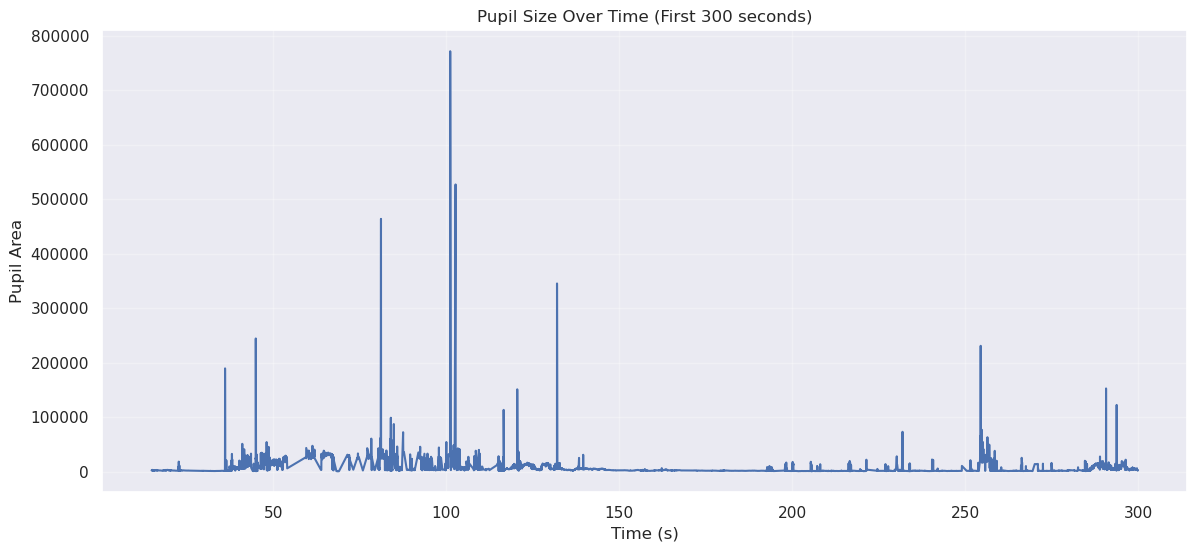

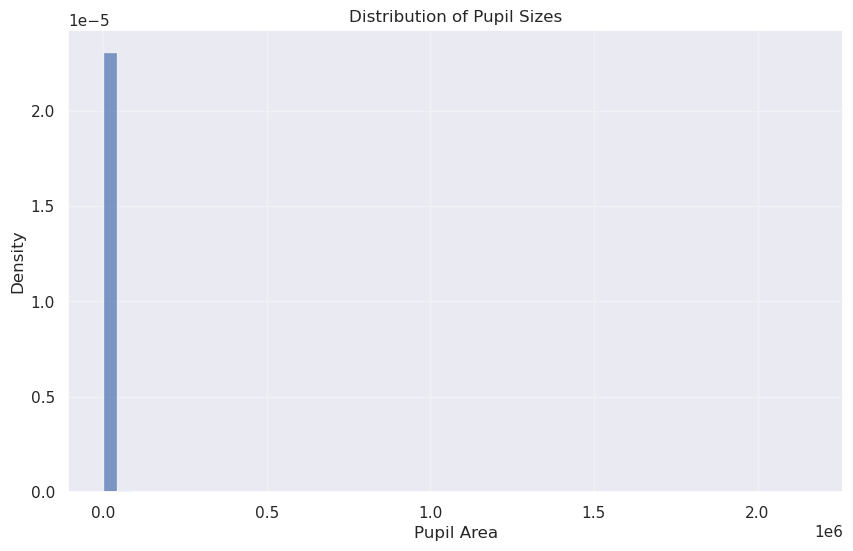

Correlation between pupil size and running speed: 0.020


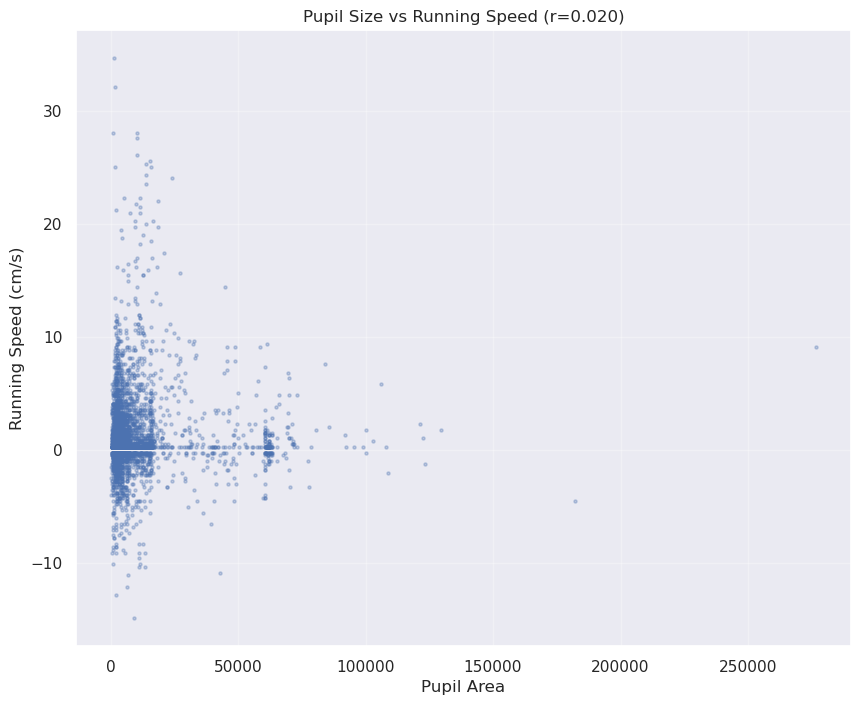

In [8]:
# Explore eye tracking data if available
if 'EyeTracking' in session_nwb.acquisition:
    eye_tracking = session_nwb.acquisition['EyeTracking']
    
    # Examine pupil tracking data
    if hasattr(eye_tracking, 'pupil_tracking'):
        pupil_tracking = eye_tracking.pupil_tracking
        
        print("Pupil tracking data summary:")
        print(f"Data shape: {pupil_tracking.data.shape}")
        
        # Get pupil area data
        pupil_data = pupil_tracking.area[:]
        pupil_timestamps = pupil_tracking.timestamps[:]
        
        # Handle NaN or inf values
        valid_mask = ~np.isnan(pupil_data) & ~np.isinf(pupil_data)
        
        if np.any(valid_mask):
            valid_pupil = pupil_data[valid_mask]
            valid_timestamps = pupil_timestamps[valid_mask]
            
            print(f"Mean pupil area: {np.mean(valid_pupil):.4f}")
            print(f"Std pupil area: {np.std(valid_pupil):.4f}")
            
            # Plot pupil size over time (first 300 seconds for clarity)
            plt.figure(figsize=(14, 6))
            max_time = 300  # seconds
            time_mask = valid_timestamps < max_time
            plt.plot(valid_timestamps[time_mask], valid_pupil[time_mask])
            plt.xlabel('Time (s)')
            plt.ylabel('Pupil Area')
            plt.title('Pupil Size Over Time (First 300 seconds)')
            plt.grid(True, alpha=0.3)
            plt.show()
            
            # Create a histogram of pupil sizes
            plt.figure(figsize=(10, 6))
            plt.hist(valid_pupil, bins=50, alpha=0.7, density=True)
            plt.xlabel('Pupil Area')
            plt.ylabel('Density')
            plt.title('Distribution of Pupil Sizes')
            plt.grid(True, alpha=0.3)
            plt.show()
            
            # Correlate with running if available
            if 'running' in session_nwb.processing and 'running_speed' in session_nwb.processing['running'].data_interfaces:
                running_speed = session_nwb.processing['running'].data_interfaces['running_speed']
                running_data = running_speed.data[:]
                running_timestamps = running_speed.timestamps[:]
                
                # Interpolate pupil data to match running speed timestamps
                interp_pupil = np.interp(
                    running_timestamps, 
                    valid_timestamps,
                    valid_pupil
                )
                
                # Calculate correlation
                corr = np.corrcoef(interp_pupil, running_data)[0, 1]
                print(f"Correlation between pupil size and running speed: {corr:.3f}")
                
                # Scatter plot (subsample for clarity)
                plt.figure(figsize=(10, 8))
                
                # Take max N points for plotting
                max_points = 5000
                if len(running_data) > max_points:
                    subsample_idx = np.random.choice(len(running_data), max_points, replace=False)
                else:
                    subsample_idx = np.arange(len(running_data))
                
                plt.scatter(interp_pupil[subsample_idx], running_data[subsample_idx], alpha=0.3, s=5)
                plt.xlabel('Pupil Area')
                plt.ylabel('Running Speed (cm/s)')
                plt.title(f'Pupil Size vs Running Speed (r={corr:.3f})')
                plt.grid(True, alpha=0.3)
                plt.show()
        else:
            print("No valid pupil data found (all NaN or inf)")
    else:
        print("No pupil tracking data found")
else:
    print("No eye tracking data found in this session")

## Summary and Future Directions

In this notebook, we've explored Dandiset 000690, which contains neural recordings from the Allen Institute's Openscope Vision2Hippocampus project. The dataset includes:

1. **Neuropixel recordings** from multiple brain regions including visual cortex, thalamus, and hippocampal regions
2. **Visual stimuli** in the form of moving bars with different parameters (velocity, width, contrast) and natural movies
3. **Behavioral data** including running speed and eye tracking

### Key Findings

- The probes were positioned to record from multiple regions along the visual processing pathway
- Visual stimuli were presented in regular, controlled sequences
- Mouse running behavior showed episodic patterns and may be modulated by visual stimuli
- The dataset contains rich information about neural activity across the visual processing hierarchy

### Future Directions

This dataset allows for numerous interesting analyses, including:

1. **Receptive field mapping** - Analyze how neurons in different regions respond to specific visual stimulus features
2. **Information flow analysis** - Study how visual information propagates from early visual areas to higher regions
3. **Neural correlates of behavior** - Examine how neural activity relates to running behavior
4. **Visual feature representation** - Compare responses to artificial stimuli vs. natural scenes
5. **Cross-regional dynamics** - Investigate synchronization and information transfer between regions

To conduct these analyses, you would need to:
- Work with spike-sorted unit data from across probes
- Align neural activity to specific stimulus features
- Potentially apply dimensionality reduction techniques to analyze population responses
- Implement encoding/decoding models to understand visual representations